In [45]:
library(readr)
library(dplyr)
library(knitr)
library(kableExtra)
library(ggplot2)
library(stringr)
library(tm,warn.conflicts = FALSE)
options(knitr.table.format = "html")

In [46]:
tweets <- read_csv('tweets.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  id = col_double(),
  time = col_datetime(format = ""),
  in_reply_to_status_id = col_double(),
  in_reply_to_user_id = col_double(),
  retweet_count = col_integer(),
  favorite_count = col_integer(),
  longitude = col_double(),
  latitude = col_double()
)
See spec(...) for full column specifications.


In [47]:
head(tweets)

id           handle         
1 7.809256e+17 HillaryClinton 
2 7.809162e+17 HillaryClinton 
3 7.809116e+17 HillaryClinton 
4 7.809070e+17 HillaryClinton 
5 7.808974e+17 HillaryClinton 
6 7.808931e+17 realDonaldTrump
  text                                                                                                                                       
1 The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG                  
2 Last night, Donald Trump said not paying taxes was "smart." You know what I call it? Unpatriotic. https://t.co/t0xmBfj7zF                  
3 Couldn't be more proud of @HillaryClinton. Her vision and command during last night's debate showed that she's ready to be our next @POTUS.
4 If we stand together, there's nothing we can't do. \n\nMake sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy     
5 Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis                 
6 Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc                    
  is_retweet original_author time                in_reply_to_screen_name
1 False      NA              2016-09-28 00:22:34 NA                     
2 True       timkaine        2016-09-27 23:45:00 NA                     
3 True       POTUS           2016-09-27 23:26:40 NA                     
4 False      NA              2016-09-27 23:08:41 NA                     
5 False      NA              2016-09-27 22:30:27 NA                     
6 False      NA              2016-09-27 22:13:24 NA                     
  in_reply_to_status_id in_reply_to_user_id is_quote_status ⋯ place_type
1 NA                    NA                  False           ⋯ NA        
2 NA                    NA                  False           ⋯ NA        
3 NA                    NA                  False           ⋯ NA        
4 NA                    NA                  False           ⋯ NA        
5 NA                    NA                  False           ⋯ NA        
6 NA                    NA                  False           ⋯ NA        
  place_country_code place_country place_contained_within place_attributes
1 NA                 NA            NA                     NA              
2 NA                 NA            NA                     NA              
3 NA                 NA            NA                     NA              
4 NA                 NA            NA                     NA              
5 NA                 NA            NA                     NA              
6 NA                 NA            NA                     NA              
  place_bounding_box source_url                                   truncated
1 NA                 https://studio.twitter.com                   False    
2 NA                 http://twitter.com                           False    
3 NA                 https://about.twitter.com/products/tweetdeck False    
4 NA                 https://studio.twitter.com                   False    
5 NA                 https://about.twitter.com/products/tweetdeck False    
6 NA                 http://twitter.com/download/iphone           True     
  entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [48]:
glimpse(tweets)

Observations: 6,444
Variables: 28
$ id                      <dbl> 7.809256e+17, 7.809162e+17, 7.809116e+17, 7...
$ handle                  <chr> "HillaryClinton", "HillaryClinton", "Hillar...
$ text                    <chr> "The question in this election: Who can put...
$ is_retweet              <chr> "False", "True", "True", "False", "False", ...
$ original_author         <chr> NA, "timkaine", "POTUS", NA, NA, NA, NA, NA...
$ time                    <dttm> 2016-09-28 00:22:34, 2016-09-27 23:45:00, ...
$ in_reply_to_screen_name <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ in_reply_to_status_id   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ in_reply_to_user_id     <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ is_quote_status         <chr> "False", "False", "False", "False", "False"...
$ lang                    <chr> "en", "en", "en", "en", "en", "en", "en", "...
$ retweet_count           <int> 218, 2445, 7834, 916, 859, 2181, 1303, 1833...
$ favorite_count  

In [49]:
tweets %>% group_by(lang) %>% count() %>% rename(Language = lang, 'Number of Tweets' = n)

Language,Number of Tweets
da,3
en,6248
es,105
et,1
fi,1
fr,2
tl,2
und,82


In [50]:
#The “Undefined” ones are generally very short tweets, and I assume that they were too short for Twitter to detect the language. The tweets other than English, Spanish or Undefined seem labeled wrongly.
#The Spanish tweets are actually in Spanish.

#However, Clinton or Trump may have retweeted in English on a tweet that was originally in Spanish. A quick analysis 
#tells me that Hillary Clinton has tweeted herself in Spanish several times, and below you can see a few of those.

In [51]:
kable(head(tweets %>% filter(lang=="es" & original_author=="") %>% select(lang, is_retweet, handle, text) %>% rename(Language = lang),5), format="html")%>%
        kable_styling() %>%
        column_spec(1, bold = T, width = "2cm", border_right = T) %>%
        column_spec(2, bold = T, width = "2cm", border_right = T) %>%
        column_spec(3, bold = T, width = "2cm", border_right = T) %>%
        column_spec(4, width = "19cm")       

ERROR: Error in xml_children(x)[[search]]: subscript out of bounds


In [52]:
tweets <- tweets %>% filter(lang != "es")

tweets$handle <- sub("realDonaldTrump", "Trump", tweets$handle)
tweets$handle <- sub("HillaryClinton", "Clinton", tweets$handle)
tweets$is_retweet <- as.logical(tweets$is_retweet)

tweets %>% filter(is_retweet==FALSE) %>% group_by(handle) %>% count()

handle,n
Clinton,2557
Trump,3091


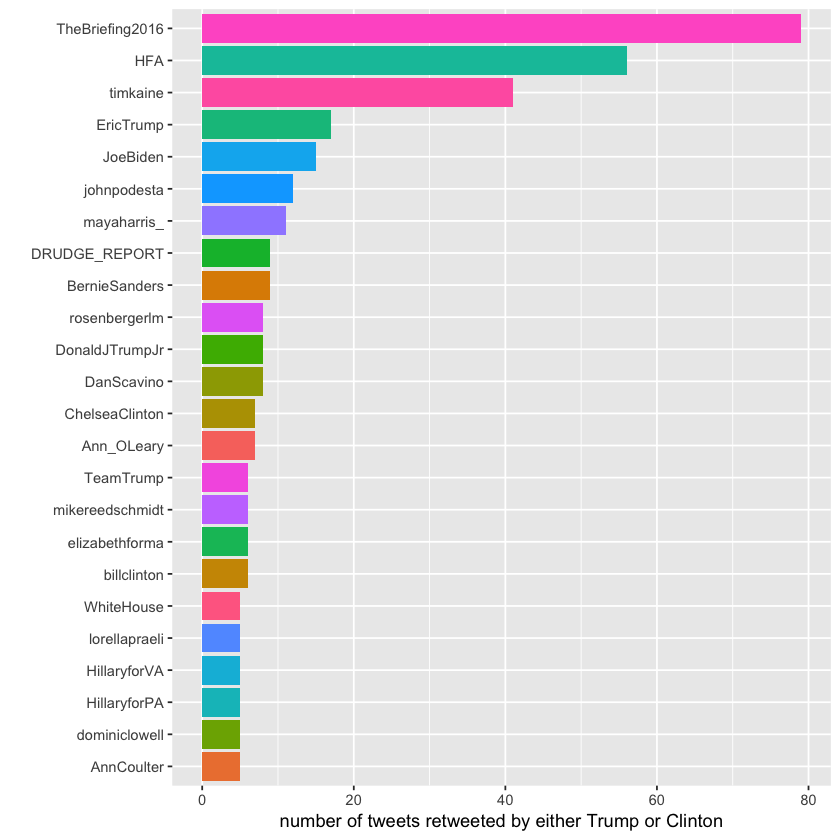

In [53]:
p1 <- tweets %>% filter(original_author != "") %>% group_by(original_author) %>% count() %>% filter(n>=5) %>% arrange(desc(n)) %>% ungroup()

ggplot(p1, aes(x=reorder(original_author, n), y=n, fill=original_author)) +
        geom_bar(stat="identity") + coord_flip() +
        labs(x="", y="number of tweets retweeted by either Trump or Clinton") +
        theme(legend.position = "none")

In [54]:
tweets$author <- ifelse(tweets$original_author != "", tweets$original_author, tweets$handle)

kable(head(tweets %>% select(author, handle, text), 20), format = "html") %>%
        kable_styling() %>%
        column_spec(1, bold = T, width = "2cm", border_right = T) %>%
        column_spec(2, bold = T, width = "2cm", border_right = T) %>%
        column_spec(3, width = "19cm")

<table class="table" style="margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> author </th>
   <th style="text-align:left;"> handle </th>
   <th style="text-align:left;"> text </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;width: 2cm; font-weight: bold;border-right:1px solid;"> NA </td>
   <td style="text-align:left;width: 2cm; font-weight: bold;border-right:1px solid;"> Clinton </td>
   <td style="text-align:left;width: 19cm; "> The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 2cm; font-weight: bold;border-right:1px solid;"> timkaine </td>
   <td style="text-align:left;width: 2cm; font-weight: bold;border-right:1px solid;"> Clinton </td>
   <td style="text-align:left;width: 19cm; "> Last night, Donald Trump said not paying taxes was "smart." You know what I call it? Unpatriotic. https://t.co/t0xm

In [55]:
tweets$text[c(2,4,6)]

[1] "Last night, Donald Trump said not paying taxes was \"smart.\" You know what I call it? Unpatriotic. https://t.co/t0xmBfj7zF"           
[2] "If we stand together, there's nothing we can't do. \n\nMake sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy"
[3] "Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc"

In [56]:
tweets$text <- str_replace_all(tweets$text, "[\n]" , "")
#URLs are always at the end and did not counts towards the 140 characters limit
tweets$text <- str_replace_all(tweets$text, "http.*" , "")
tweets$text <- gsub("[^[:alnum:]^[:space:]]","",tweets$text) #removes everything that is not alpha numeric (i.e. UTF-8 emoticons etc.)
tweets$text <- gsub("�\\s$", "", tweets$text) #removing some untidy stuff at the end of some tweets

tweets$text[c(2,4,6)]

[1] "Last night Donald Trump said not paying taxes was smart You know what I call it Unpatriotic "
[2] "If we stand together theres nothing we cant do Make sure youre ready to vote "               
[3] "Join me for a 3pm rally  tomorrow at the MidAmerica Center in Council Bluffs Iowa Tickets "

In [ ]:
#Creating a VCorpus object
#A corpus is a collection of documents, but it’s also important to know that in the tm domain, R recognizes it as a 
#data type. The volatile corpus is held in the computer’s RAM. The VCorpus can easily be made with the tm package. 
#One column needs to have a unique document id (and must be named doc_id), one column must be named ‘text’, and all 
#other variables are stored as metadata. At the moment I have split into separate dataframes for the Clinton and Trump 
#Tweets (but will look into this again to see if this is necessary). The first one that I am investigating is the 
#“Trump corpus”.

In [57]:
tweets <- tweets %>% rename (doc_id = id)
ClintonTweets <- tweets %>% filter(is_retweet=="FALSE" & handle=="Clinton")
TrumpTweets <- tweets %>% filter(is_retweet=="FALSE" & handle=="Trump")

TrumpCorpus <- DataframeSource(TrumpTweets)
TrumpCorpus <- VCorpus(TrumpCorpus)
TrumpCorpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 27
Content:  documents: 3091

In [58]:
inspect(TrumpCorpus[1:2])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 27
Content:  documents: 2

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 90

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 86



In [59]:
content(TrumpCorpus[[1]])

[1] "Join me for a 3pm rally  tomorrow at the MidAmerica Center in Council Bluffs Iowa Tickets "

In [60]:
print(sort(stopwords("en")))

  [1] "a"          "about"      "above"      "after"      "again"     
  [6] "against"    "all"        "am"         "an"         "and"       
 [11] "any"        "are"        "aren't"     "as"         "at"        
 [16] "be"         "because"    "been"       "before"     "being"     
 [21] "below"      "between"    "both"       "but"        "by"        
 [26] "can't"      "cannot"     "could"      "couldn't"   "did"       
 [31] "didn't"     "do"         "does"       "doesn't"    "doing"     
 [36] "don't"      "down"       "during"     "each"       "few"       
 [41] "for"        "from"       "further"    "had"        "hadn't"    
 [46] "has"        "hasn't"     "have"       "haven't"    "having"    
 [51] "he"         "he'd"       "he'll"      "he's"       "her"       
 [56] "here"       "here's"     "hers"       "herself"    "him"       
 [61] "himself"    "his"        "how"        "how's"      "i"         
 [66] "i'd"        "i'll"       "i'm"        "i've"       "if"        
 [71] 

In [62]:
CleanCorpus <- function(x){
     x <- tm_map(x, removePunctuation)
     x <- tm_map(x, content_transformer(tolower))
     x <- tm_map(x, removeWords, stopwords("en"))
     x <- tm_map(x, stripWhitespace)
     return(x)
}

TrumpCorpus <- CleanCorpus(TrumpCorpus)

TermsTrump <- TermDocumentMatrix(TrumpCorpus)
MatrixTrump <- as.matrix(TermsTrump)

TermFreqTrump <- rowSums(MatrixTrump)
TermFreqTrump <- sort(TermFreqTrump, decreasing = TRUE)

In [63]:
content(TrumpCorpus[[1]])

[1] "join 3pm rally tomorrow midamerica center council bluffs iowa tickets "

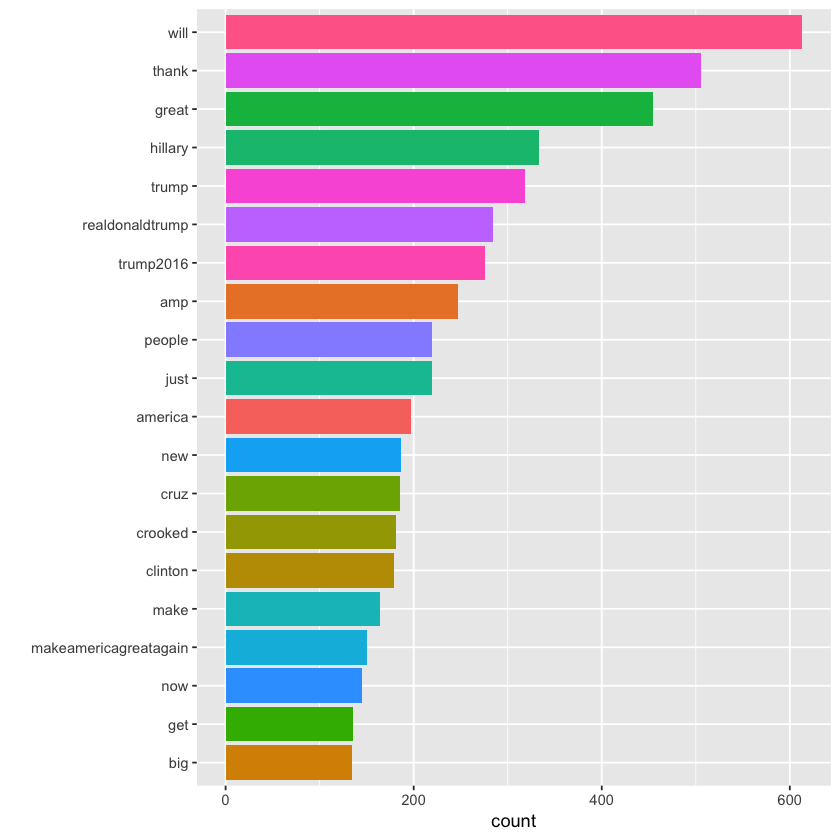

In [64]:
p2 <- data.frame(word=names(TermFreqTrump), count=TermFreqTrump)

p2[1:20,] %>%
        ggplot(aes(x=(reorder(word, count)), y=count, fill=word)) +
        geom_bar(stat='identity') + coord_flip() + theme(legend.position = "none") +
        labs(x="")